In [1]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [2]:
df = pd.read_csv(r"C:\Users\jorge\OneDrive\Área de Trabalho\pattern-recognition-RP\data\bostonbin.csv", header=None)

In [3]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [4]:
X = np.nan_to_num(X)
y = np.nan_to_num(y) 

In [5]:
X.shape, y.shape

((506, 17), (506,))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
X_test.shape, y_test.shape

((152, 17), (152,))

In [ ]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)
    model = SVC(kernel='rbf', C=C, gamma=gamma, probability=True)

    score = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    return score.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

optuna_best_params = study.best_params
print("Melhores parâmetros encontrados pelo Optuna:", optuna_best_params)

best_svc_optuna = SVC(kernel='rbf', C=optuna_best_params['C'], gamma=optuna_best_params['gamma'], probability=True)
best_svc_optuna.fit(X_train, y_train)

y_pred_optuna = best_svc_optuna.predict(X_test)

accuracy_optuna = accuracy_score(y_test, y_pred_optuna)
precision_optuna = precision_score(y_test, y_pred_optuna)
recall_optuna = recall_score(y_test, y_pred_optuna)
f1_optuna = f1_score(y_test, y_pred_optuna)

print(f"Acurácia com otimização bayesiana (Optuna): {accuracy_optuna:.4f}")
print(f"Precisão com Optuna: {precision_optuna:.4f}")
print(f"Recall com Optuna: {recall_optuna:.4f}")
print(f"F1-score com Optuna: {f1_optuna:.4f}")

param_grid = {
    'C': [2**i for i in range(-5, 12, 2)], 
    'gamma': [2**i for i in range(-15, 4, 2)] 
}

grid_search = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

grid_search_best_params = grid_search.best_params_
print("Melhores parâmetros encontrados pelo GridSearchCV:", grid_search_best_params)

best_svc_grid = grid_search.best_estimator_
best_svc_grid.fit(X_train, y_train)

y_pred_grid = best_svc_grid.predict(X_test)

accuracy_grid = accuracy_score(y_test, y_pred_grid)
precision_grid = precision_score(y_test, y_pred_grid)
recall_grid = recall_score(y_test, y_pred_grid)
f1_grid = f1_score(y_test, y_pred_grid)

print(f"Acurácia com GridSearchCV: {accuracy_grid:.4f}")
print(f"Precisão com GridSearchCV: {precision_grid:.4f}")
print(f"Recall com GridSearchCV: {recall_grid:.4f}")
print(f"F1-score com GridSearchCV: {f1_grid:.4f}")


fpr_optuna, tpr_optuna, _ = roc_curve(y_test, best_svc_optuna.predict_proba(X_test)[:, 1])
roc_auc_optuna = auc(fpr_optuna, tpr_optuna)

precision_optuna_curve, recall_optuna_curve, _ = precision_recall_curve(y_test, best_svc_optuna.predict_proba(X_test)[:, 1])

fpr_grid, tpr_grid, _ = roc_curve(y_test, best_svc_grid.predict_proba(X_test)[:, 1])
roc_auc_grid = auc(fpr_grid, tpr_grid)

precision_grid_curve, recall_grid_curve, _ = precision_recall_curve(y_test, best_svc_grid.predict_proba(X_test)[:, 1])

[I 2025-01-19 15:19:36,538] A new study created in memory with name: no-name-4f1a6f4f-d938-49a5-8d02-e623433fce80
C:\Users\jorge\AppData\Local\Temp\ipykernel_10940\1764171319.py:19: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)  # valor de C entre 10^-5 e 10^5
C:\Users\jorge\AppData\Local\Temp\ipykernel_10940\1764171319.py:20: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)  # valor de gamma entre 10^-5 e 10^5
[I 2025-01-19 15:19:37,824] Trial 0 finished with value: 0.5057142857142857 and parameters: {'C': 684.6626712582533, 'gamma': 686.2733223324515}. Best is trial 0 with v

Melhores parâmetros encontrados pelo Optuna: {'C': 0.3533618950424517, 'gamma': 0.01884746308793577}
Acurácia com otimização bayesiana (Optuna): 0.9367
Precisão com Optuna: 0.9156
Recall com Optuna: 0.9592
F1-score com Optuna: 0.9369
Fitting 10 folds for each of 90 candidates, totalling 900 fits
Melhores parâmetros encontrados pelo GridSearchCV: {'C': 2, 'gamma': 0.03125}
Acurácia com GridSearchCV: 0.9533
Precisão com GridSearchCV: 0.9404
Recall com GridSearchCV: 0.9660
F1-score com GridSearchCV: 0.9530


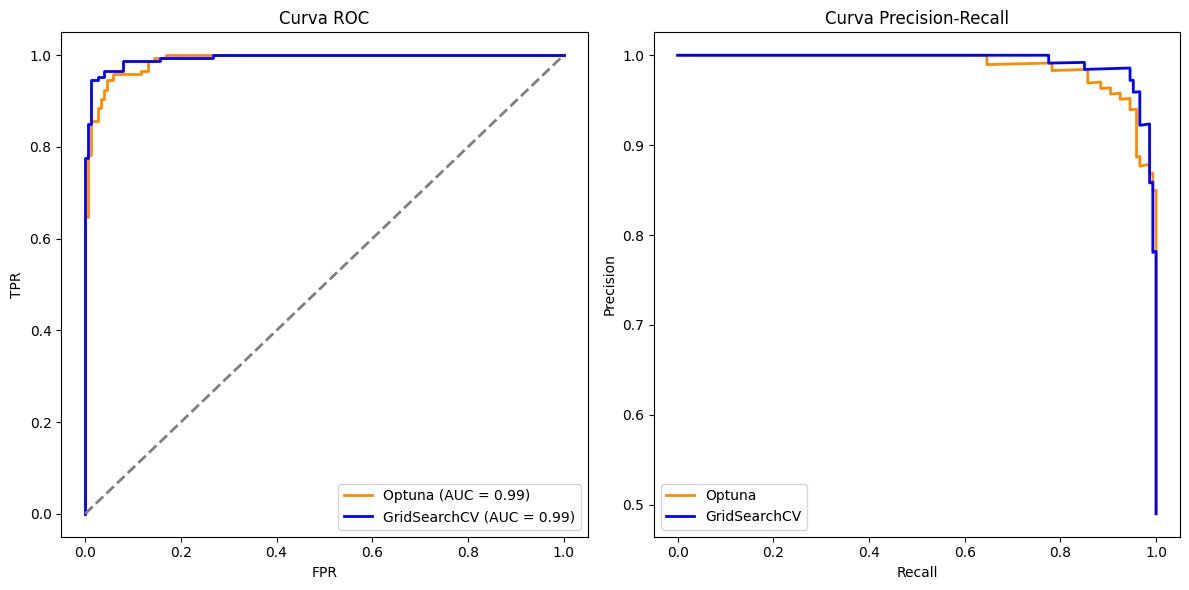


Comparação de desempenho:
Acurácia com Optuna: 0.9367
Acurácia com GridSearchCV: 0.9533
Precisão com Optuna: 0.9156
Precisão com GridSearchCV: 0.9404
Recall com Optuna: 0.9592
Recall com GridSearchCV: 0.9660
F1-score com Optuna: 0.9369
F1-score com GridSearchCV: 0.9530


In [15]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr_optuna, tpr_optuna, color='darkorange', lw=2, label=f'Optuna (AUC = {roc_auc_optuna:.2f})')
plt.plot(fpr_grid, tpr_grid, color='blue', lw=2, label=f'GridSearchCV (AUC = {roc_auc_grid:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(recall_optuna_curve, precision_optuna_curve, color='darkorange', lw=2, label=f'Optuna')
plt.plot(recall_grid_curve, precision_grid_curve, color='blue', lw=2, label=f'GridSearchCV')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

print("\nComparação de desempenho:")
print(f"Acurácia com Optuna: {accuracy_optuna:.4f}")
print(f"Acurácia com GridSearchCV: {accuracy_grid:.4f}")
print(f"Precisão com Optuna: {precision_optuna:.4f}")
print(f"Precisão com GridSearchCV: {precision_grid:.4f}")
print(f"Recall com Optuna: {recall_optuna:.4f}")
print(f"Recall com GridSearchCV: {recall_grid:.4f}")
print(f"F1-score com Optuna: {f1_optuna:.4f}")
print(f"F1-score com GridSearchCV: {f1_grid:.4f}")
